In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
from fastai.vision.all import *
from fastai.metrics import error_rate
import matplotlib.pyplot as plt
import numpy as np
import sahi
from sahi.slicing import slice_image
from sahi.utils.file import save_json
from sahi import DetectionModel
from sahi.utils.cv import read_image
from sahi.predict import get_sliced_prediction
from sahi.models.torchvision import TorchVisionDetectionModel
import torch
import torchvision.models as models

In [3]:
images_folder = "yolo-focused-full"
masks_folder = "focused_masks-full"
path = Path(f'/home/p.kuznetsov/runaway/datasets')

In [4]:
def get_mask_path(image_path):
    return str(image_path).replace(images_folder, masks_folder).replace("/images", "").replace(".jpg", ".png")

In [5]:
segmentation_block = DataBlock(
    blocks=(ImageBlock, MaskBlock),
    get_items=get_image_files,
    # splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    splitter=IndexSplitter([]),
    get_y=get_mask_path,
)

In [6]:
dls = segmentation_block.dataloaders(path/images_folder, path=path, bs=4)  

In [7]:
len(dls.train_ds), len(dls.valid_ds)

(30110, 0)

In [8]:
model = "resnet50"
learn = unet_learner(dls, resnet50, metrics=Dice(), n_out=3)
learn.opt_fn = Adam

In [ ]:
learn.lr_find()

In [10]:
learn.fit(1, 6e-4)

epoch,train_loss,valid_loss,dice,time
0,0.010001,None,None,56:43


/home/p.kuznetsov/.venv/lib/python3.9/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [11]:
learn.save(f"{model}-stage-1-full")

Path('/home/p.kuznetsov/runaway/datasets/models/resnet50-stage-1-full.pth')

In [ ]:
learn.load(f"{model}-stage-1-full")

In [ ]:
learn.fit_one_cycle(1, slice(1e-5, 1e-3))

In [ ]:
learn.save(f"{model}-stage-2-full")

In [ ]:
learn.load(f"{model}-stage-2-full")

In [ ]:
learn.fit_one_cycle(1, slice(1e-5, 1e-3))

In [ ]:
learn.save(f"{model}-stage-3-full")

In [ ]:
learn.load(f"{model}-stage-3-full")

In [ ]:
learn.fit_one_cycle(1, slice(1e-5, 1e-3))

In [ ]:
learn.save(f"{model}-stage-4-full")

In [ ]:
learn.load(f"{model}-stage-4-full")

In [9]:
learn.export(f"{model}-export-full.pkl")

In [ ]:
learn.validate()

In [4]:
learn = load_learner("./datasets/resnet50-export.pkl")

In [5]:
test_image_path = "test_images/2020_01.shp/2019-09-01_2019-10-10/default.png"

In [6]:
image = PILImage.create(test_image_path)

In [7]:
image_np = np.array(image)

In [8]:
pred_mask, pred_idx, outputs = learn.predict(image)

In [22]:
class_0_probs = outputs[0]
class_1_probs = outputs[1]

In [39]:
confident_mask_6 = class_1_probs < 0.6
confident_mask_8 = class_1_probs < 0.8
confident_mask_9 = class_1_probs < 0.9

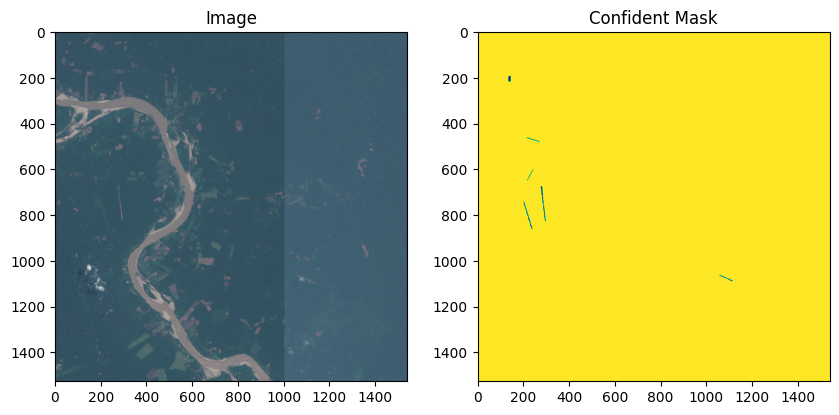

In [76]:
plt.figure(figsize=(10, 5))

# Display the first image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image')

# Display the second image
plt.subplot(1, 2, 2)
plt.imshow(confident_mask_9)
plt.title('Confident Mask')

plt.show()

In [79]:
test_image_path = "test_images/2020_01.shp/2020-04-27_2020-06-06/default.png"
image = PILImage.create(test_image_path)
pred_mask, pred_idx, outputs = learn.predict(image)
class_1_probs = outputs[1]
confident_mask_8 = class_1_probs < 0.8
confident_mask_9 = class_1_probs < 0.9

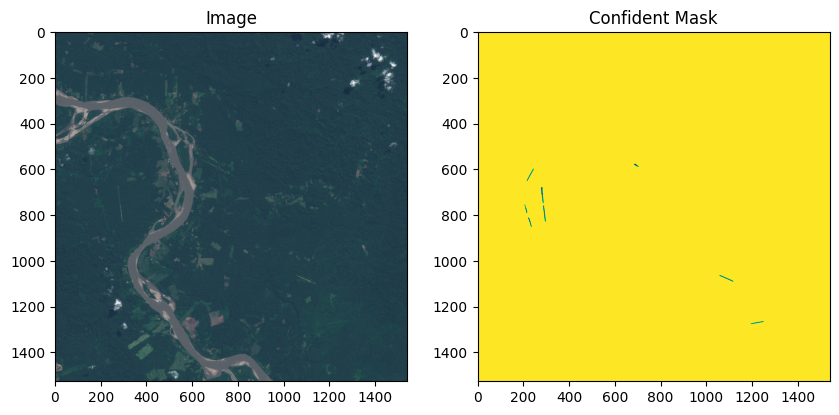

In [83]:
plt.figure(figsize=(10, 5))

# Display the first image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image')

# Display the second image
plt.subplot(1, 2, 2)
plt.imshow(confident_mask_8)
plt.title('Confident Mask')

plt.show()